In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../data/curated/team_gamelog_all_seasons.parquet")
print(df.shape)
df


(59968, 30)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,season
0,21999,1610612752,NYK,New York Knicks,0029900001,1999-11-02,NYK vs. CLE,W,240,32,...,44,17,10,10,18,23,92,8,0,1999-00
1,21999,1610612749,MIL,Milwaukee Bucks,0029900008,1999-11-02,MIL @ HOU,W,240,38,...,35,20,10,2,8,25,98,5,0,1999-00
2,21999,1610612751,NJN,New Jersey Nets,0029900002,1999-11-02,NJN vs. IND,L,240,36,...,45,11,11,4,18,39,112,-7,0,1999-00
3,21999,1610612745,HOU,Houston Rockets,0029900008,1999-11-02,HOU vs. MIL,L,240,34,...,42,22,5,7,18,24,93,-5,0,1999-00
4,21999,1610612739,CLE,Cleveland Cavaliers,0029900001,1999-11-02,CLE @ NYK,L,240,30,...,38,23,10,2,19,27,84,-8,0,1999-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59963,22023,1610612747,LAL,Los Angeles Lakers,0022301195,2024-04-14,LAL @ NOP,W,240,48,...,39,32,12,3,15,13,124,16,1,2023-24
59964,22023,1610612742,DAL,Dallas Mavericks,0022301196,2024-04-14,DAL @ OKC,L,240,32,...,41,19,8,2,15,15,86,-49,1,2023-24
59965,22023,1610612760,OKC,Oklahoma City Thunder,0022301196,2024-04-14,OKC vs. DAL,W,240,54,...,58,38,6,6,15,17,135,49,1,2023-24
59966,22023,1610612750,MIN,Minnesota Timberwolves,0022301194,2024-04-14,MIN vs. PHX,L,240,36,...,36,22,7,5,24,20,106,-19,1,2023-24


In [19]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE',
       'season'],
      dtype='object')

In [20]:
# Pourcentage de valeurs manquantes
print(df.isnull().mean().sort_values(ascending=False))

# Types de variables
print(df.dtypes)

FT_PCT               0.000050
WL                   0.000033
FG_PCT               0.000033
FG3_PCT              0.000033
SEASON_ID            0.000000
VIDEO_AVAILABLE      0.000000
PLUS_MINUS           0.000000
PTS                  0.000000
PF                   0.000000
TOV                  0.000000
BLK                  0.000000
STL                  0.000000
AST                  0.000000
REB                  0.000000
DREB                 0.000000
OREB                 0.000000
FTM                  0.000000
FTA                  0.000000
TEAM_ID              0.000000
FG3A                 0.000000
FG3M                 0.000000
FGA                  0.000000
FGM                  0.000000
MIN                  0.000000
MATCHUP              0.000000
GAME_DATE            0.000000
GAME_ID              0.000000
TEAM_NAME            0.000000
TEAM_ABBREVIATION    0.000000
season               0.000000
dtype: float64
SEASON_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     objec

In [21]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
TEAM_ID,59968.0,1.610613e+09,8.618314,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09,1.610613e+09
MIN,59968.0,2.417396e+02,7.528386,0.000000e+00,2.400000e+02,2.400000e+02,2.400000e+02,3.400000e+02
FGM,59968.0,3.802261e+01,5.511321,0.000000e+00,3.400000e+01,3.800000e+01,4.200000e+01,6.500000e+01
FGA,59968.0,8.344537e+01,8.015771,0.000000e+00,7.800000e+01,8.300000e+01,8.900000e+01,1.290000e+02
FG_PCT,59966.0,4.564694e-01,0.056468,2.390000e-01,4.180000e-01,4.560000e-01,4.940000e-01,6.870000e-01
FG3M,59968.0,8.002118e+00,4.289137,0.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01,2.900000e+01
FG3A,59968.0,2.237742e+01,9.794090,0.000000e+00,1.500000e+01,2.100000e+01,2.900000e+01,7.000000e+01
FG3_PCT,59966.0,3.540988e-01,0.113946,0.000000e+00,2.820000e-01,3.530000e-01,4.290000e-01,1.000000e+00
FTM,59968.0,1.808616e+01,6.192516,0.000000e+00,1.400000e+01,1.800000e+01,2.200000e+01,5.200000e+01
FTA,59968.0,2.377691e+01,7.625327,0.000000e+00,1.800000e+01,2.300000e+01,2.900000e+01,6.400000e+01


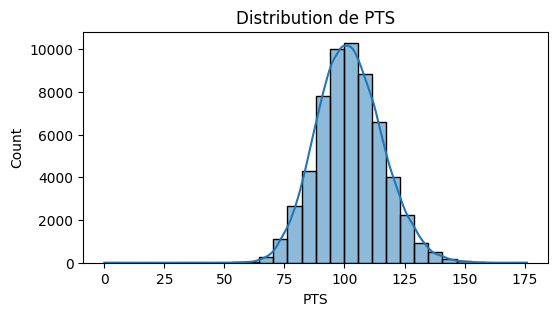

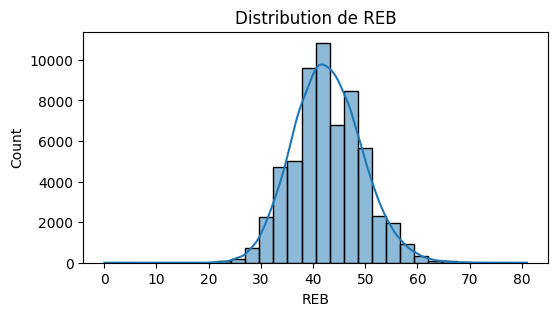

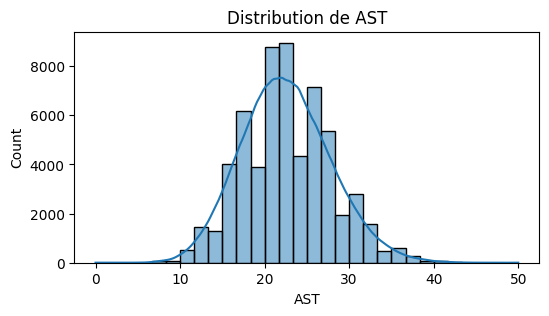

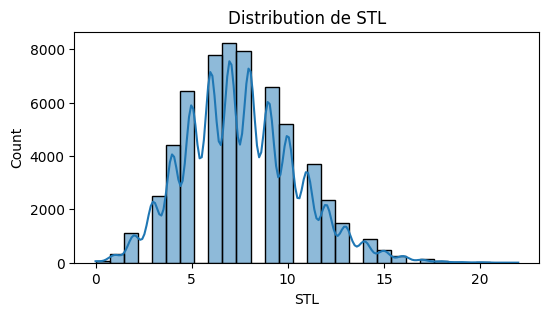

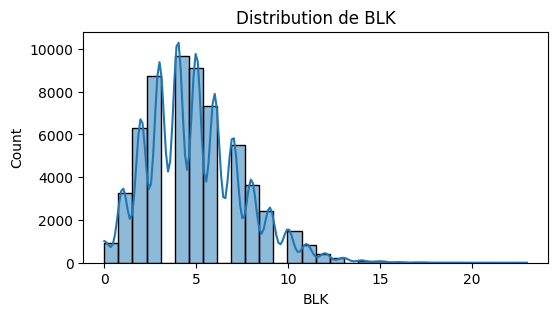

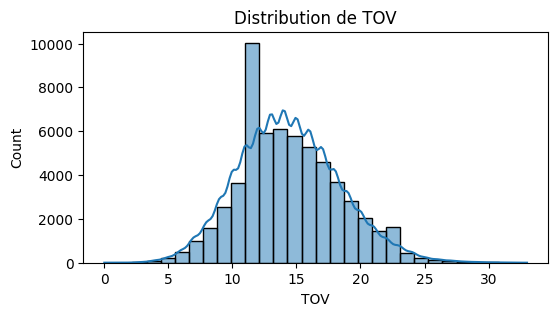

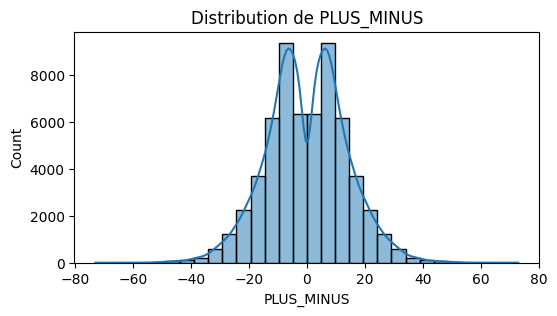

In [22]:
features = ["PTS", "REB", "AST", "STL", "BLK", "TOV", "PLUS_MINUS"]
for col in features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


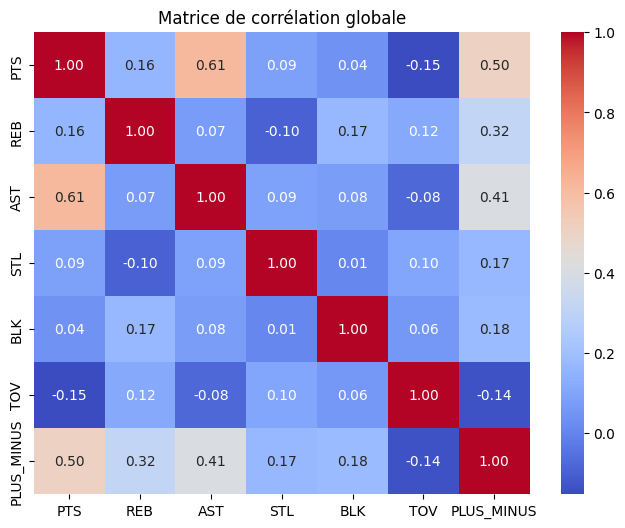

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation globale")
plt.show()


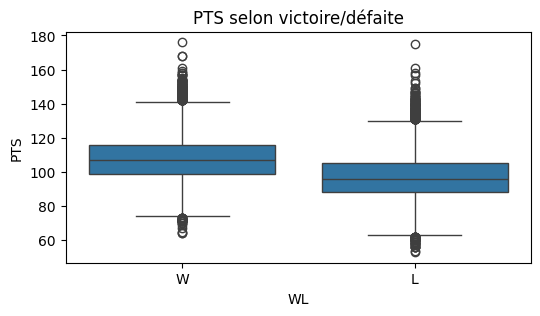

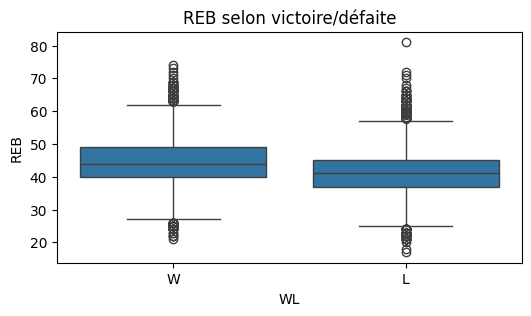

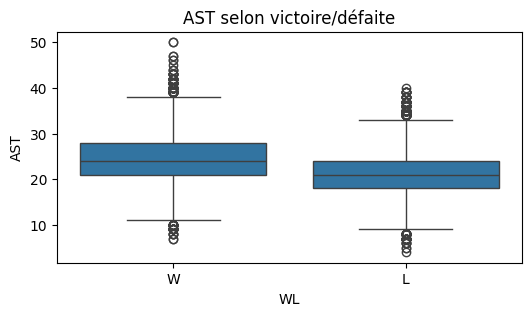

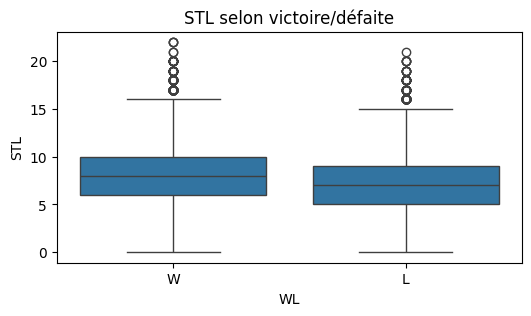

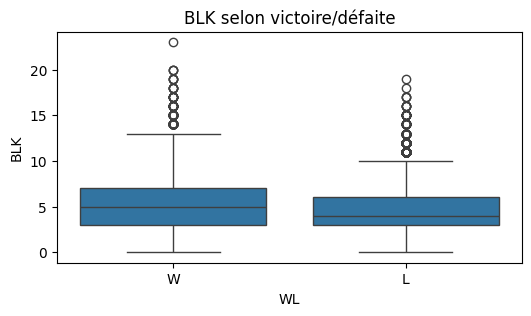

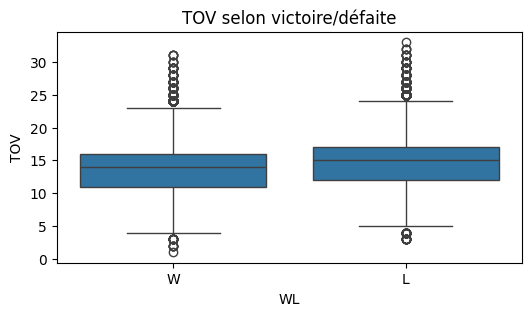

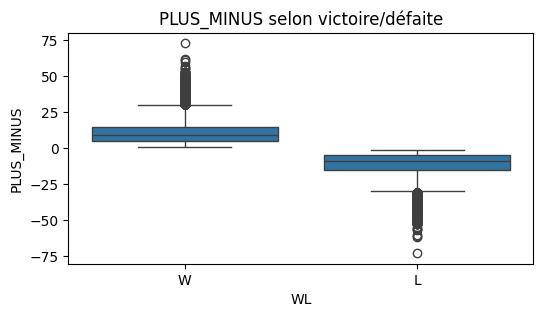

In [24]:
for col in features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x="WL", y=col, data=df)
    plt.title(f"{col} selon victoire/défaite")
    plt.show()


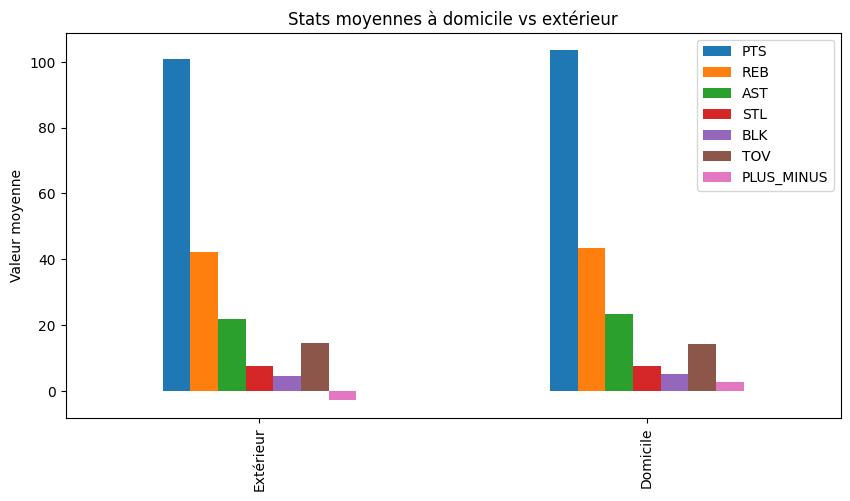

In [25]:
if "HOME" not in df.columns:
    df["HOME"] = df["MATCHUP"].apply(lambda x: 1 if "vs." in x else 0)

home_stats = df.groupby("HOME")[features].mean()
home_stats.index = ["Extérieur", "Domicile"]
home_stats.plot(kind="bar", figsize=(10,5))
plt.title("Stats moyennes à domicile vs extérieur")
plt.ylabel("Valeur moyenne")
plt.show()


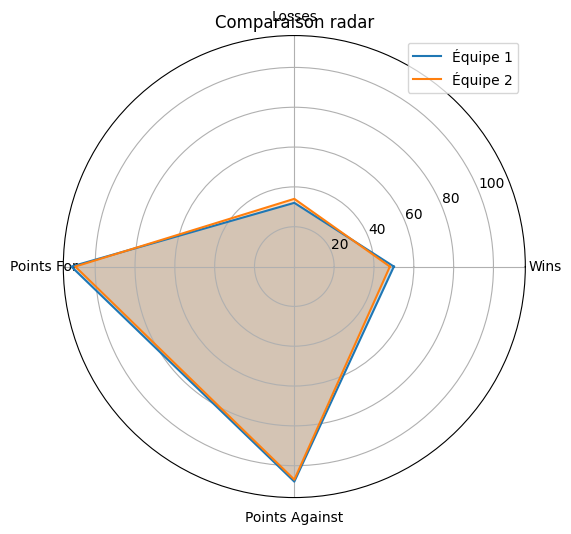

In [26]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["Wins", "Losses", "Points For", "Points Against"]  # 4 features
stats1 = [50, 32, 112, 108]  # exemple pour une équipe
stats2 = [48, 34, 110, 107]  # exemple pour une autre équipe

# Boucler pour fermer le cercle
stats1 = np.concatenate((stats1, [stats1[0]]))
stats2 = np.concatenate((stats2, [stats2[0]]))
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # fermer le cercle

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, stats1, label="Équipe 1")
ax.plot(angles, stats2, label="Équipe 2")
ax.fill(angles, stats1, alpha=0.25)
ax.fill(angles, stats2, alpha=0.25)

# ⚠ Il faut N labels pour N angles SANS le dernier angle dupliqué
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend()
plt.title("Comparaison radar")
plt.show()


In [34]:
team_profiles = df.groupby("TEAM_ID")[features].mean()
team_profiles = team_profiles.reset_index()


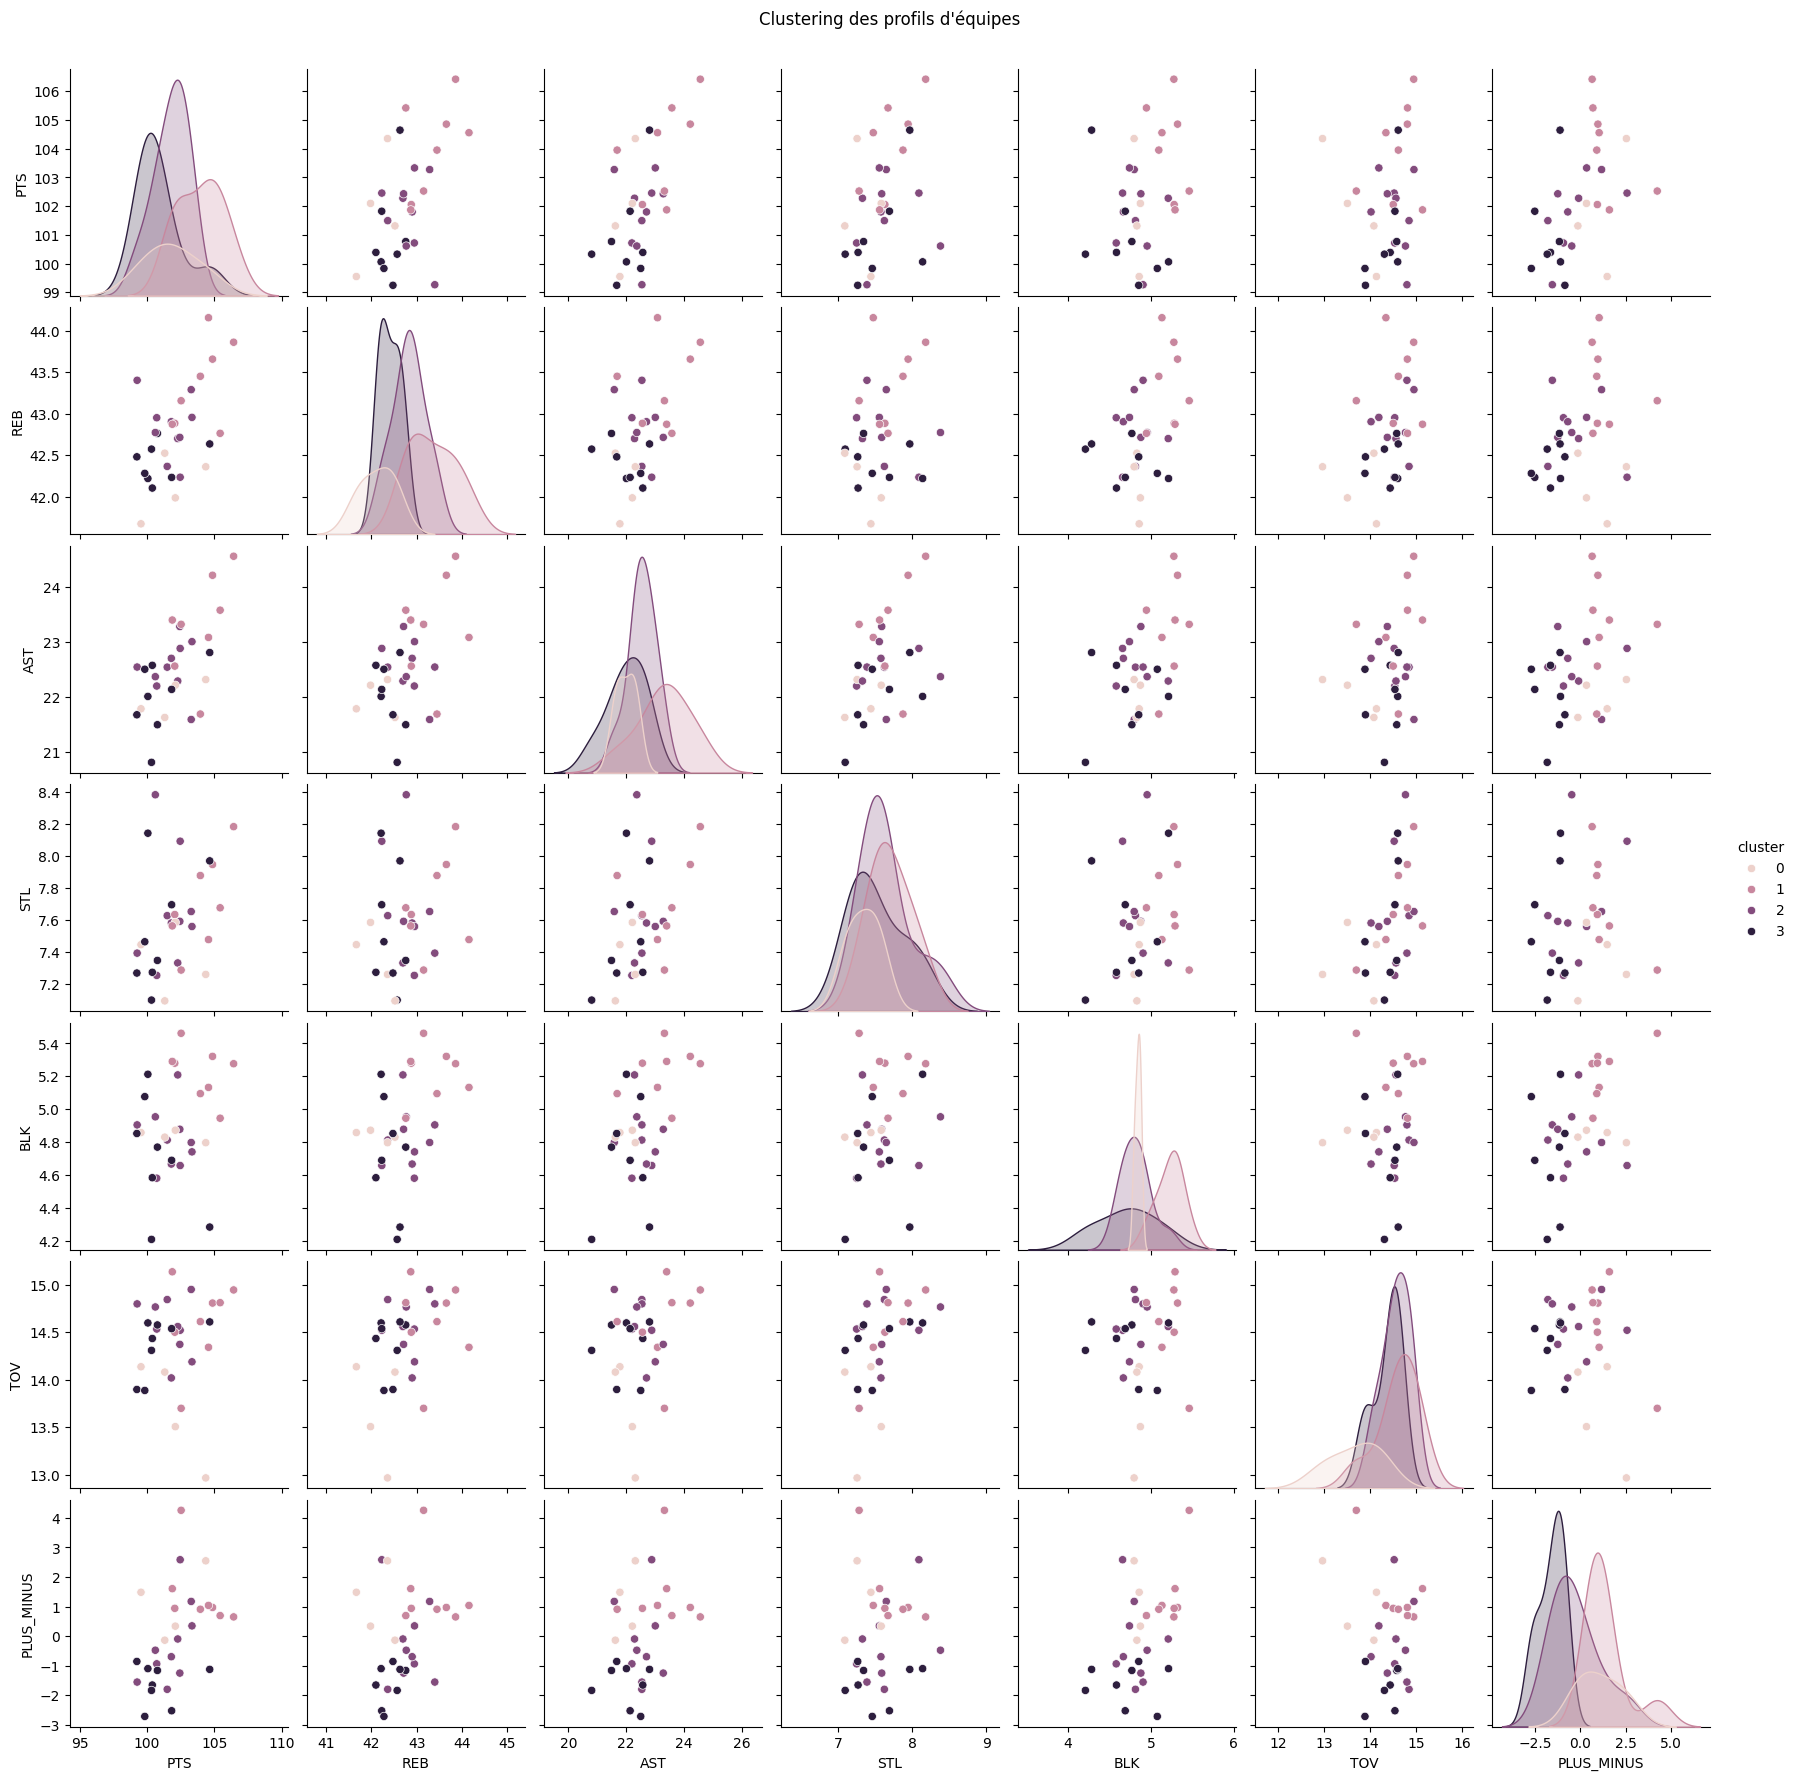

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = team_profiles.values
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)
team_profiles["cluster"] = labels

sns.pairplot(team_profiles, hue="cluster", vars=features)
plt.suptitle("Clustering des profils d'équipes", y=1.02)
plt.show()


In [28]:
# Exemple : prédire la victoire (WL) à partir des stats d’équipe
ml_features = ["PTS", "REB", "AST", "STL", "BLK", "TOV", "PLUS_MINUS", "HOME"]
X = df[ml_features]
y = (df["WL"] == "W").astype(int)
print(X.shape, y.shape)


(59968, 8) (59968,)


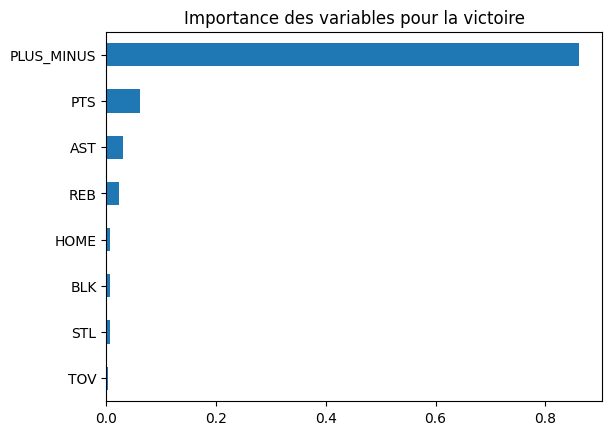

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=ml_features)
importances.sort_values().plot(kind="barh")
plt.title("Importance des variables pour la victoire")
plt.show()


- PLUS_MINUS : Ce score synthétique mesure l’impact global d’une équipe sur le terrain (écart de points lorsque l’équipe est en jeu). Il ressort comme la variable la plus prédictive de la victoire.
- PTS (Points) : Le nombre total de points marqués par l’équipe, ce qui est logiquement très lié à la victoire.
- AST (Assists) : Le nombre de passes décisives, indicateur d’un jeu collectif efficace.
- REB (Rebounds) : Les rebonds captés, qui traduisent la capacité à récupérer la balle et à contrôler le rythme du match.
- HOME : Le fait de jouer à domicile ou à l’extérieur, qui a un effet non négligeable sur les résultats.
- BLK (Blocks) et STL (Steals) : Les contres et interceptions, qui reflètent l’intensité défensive de l’équipe.
- TOV (Turnovers) : Les balles perdues, qui ont un impact négatif sur la probabilité de victoire.



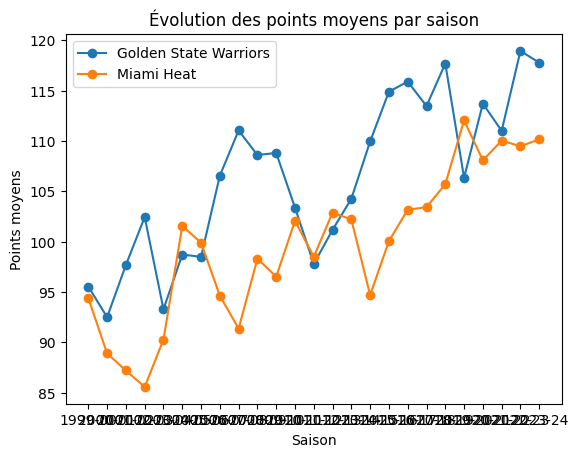

In [30]:
# Évolution des points moyens par équipe sur plusieurs saisons
for team in ["Golden State Warriors", "Miami Heat"]:
    pts = df[df["TEAM_NAME"] == team].groupby("season")["PTS"].mean()
    plt.plot(pts.index, pts.values, marker="o", label=team)
plt.title("Évolution des points moyens par saison")
plt.xlabel("Saison")
plt.ylabel("Points moyens")
plt.legend()
plt.show()


In [31]:
# Prédire la victoire sur un échantillon test
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))


Accuracy : 1.0
Matrice de confusion :
 [[6007    0]
 [   0 5987]]
